# Classificação 

Será usado um exemplo ilustrativo para entendermos como funciona o machine learning. A ideia é diferenciar dois animais com características diferentes: um porco e um cachorro.

A previsão que faremos usa algoritmos de classificação. Esses algorítimos podem ser utilizados para classificar itens ou prever comportamentos de usuário no momento de comprar um produto, por exemplo. Para isso teremos:

1. Features 
2. Itens 
3. Treino do estimador 
4. Testes 
5. Taxa de acerto 
6. Otimização 
7. Previsão

In [4]:
# carregando os dados

import pandas as pd
import pendulum as pdl

url = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(url)
dados.head()


,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
mapa = { 
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)

In [ ]:
x = dados[["principal","como_funciona","contato"]]
y = dados[["comprou"]]

y.head()

In [ ]:
dados.shape

In [ ]:
# Biblioteca para treinar e testar o modelo
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Verificando os dados de entrada
if x is None or y is None:
    raise ValueError("Certifique-se de que 'x' e 'y' estão corretamente definidos.")

# Separando treino e teste usando o sklearn (train_test_split)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, random_state=42, stratify = y)

print(treino_x.shape)
print(teste_x.shape)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Modelo LinearSVC
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

In [ ]:
print(treino_y.value_counts())
print(teste_y.value_counts())

# Preço de carros

In [5]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(url)

data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [6]:
dictonary = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
data = data.rename(columns=dictonary)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [7]:
# Alterando os dados da coluna vendido
alterar_vendido = {
    'no': 0,
    'yes': 1
}
data.vendido = data.vendido.map(alterar_vendido)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [8]:
# Calcular a idade do modelo do carro
data['idade_do_modelo'] = pdl.now().year - data.ano_do_modelo

data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [9]:
# Calcular a quilometragem por ano
data['km_por_ano'] = (data.milhas_por_ano * 1.60934).round(2)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22
1,1,7843,1998,40557.96,1,25,12622.05
2,2,7109,2006,89627.50,0,17,11440.80
3,3,26823,2015,95276.14,0,8,43167.33
4,4,7935,2014,117384.68,1,9,12770.11


In [10]:
# Verificando os dados de entrada em categorias e numericos
def categoria(col):
    numerico, categorico=[], []
    for i in col:
        if data[i].dtype ==object:
            categorico.append(i)
        else:
            numerico.append(i)
    print("The numerical features {}:".format(numerico))
    print("The categorical features {}:".format(categorico))
    return categorico, numerico

# Separando as colunas em categoricas e numericas

categorico, numerico = categoria(data.columns)

The numerical features ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo', 'preco', 'vendido', 'idade_do_modelo', 'km_por_ano']:
The categorical features []:


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

x = data[["preco", "idade_do_modelo", "km_por_ano"]]
y = data["vendido"]

# Separando treino e teste usando o sklearn (train_test_split)

np.random.seed(42)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(
    x, 
    y, 
    test_size = 0.25,
    stratify = y
)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

# scaler = StandardScaler()
# scaler.fit(raw_treino_x)
# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

modelo =  DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 78.04%


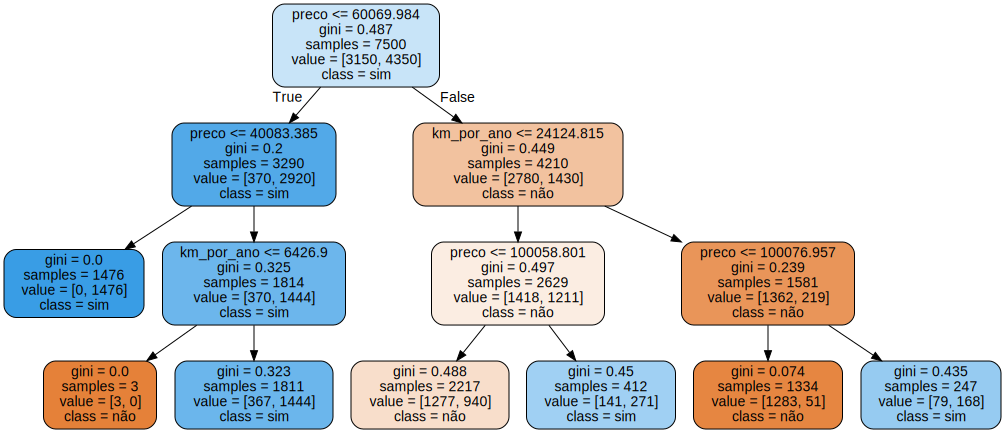

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    modelo, 
    out_file=None, 
    feature_names=x.columns, 
    filled=True, 
    rounded=True,
    class_names=["não", "sim"],
    
)

grafico = graphviz.Source(dot_data)

grafico


In [ ]:
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22
1,1,7843,1998,40557.96,1,25,12622.05
2,2,7109,2006,89627.50,0,17,11440.80
3,3,26823,2015,95276.14,0,8,43167.33
4,4,7935,2014,117384.68,1,9,12770.11


In [ ]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador
np.random.seed(42)
data['modelo'] = data.idade_do_modelo + np.random.randint(-2, 3, size=10000)
data.modelo = data.modelo + abs(data.modelo.min()) + 1
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,0,21801,2000,30941.02,1,23,35085.22,29
1,1,7843,1998,40557.96,1,25,12622.05,32
2,2,7109,2006,89627.50,0,17,11440.80,22
3,3,26823,2015,95276.14,0,8,43167.33,15
4,4,7935,2014,117384.68,1,9,12770.11,16


In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate

# situação horrível de "azar" onde as classes estão ordenadas por padrão
dados_azar = data.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

 # overfitting - treino = 100% e teste = 78%
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = data.modelo, return_train_score=True)
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f," % (max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100))
  tabela = [max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100]
  return tabela

for i in range (1, 33):
      roda_arvore_de_decisao(i)

resultados = [roda_arvore_de_decisao(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "test"])
resultados.head()

Arvore max_depth = 1, treino = 75.79, teste = 75.75,
Arvore max_depth = 2, treino = 75.79, teste = 75.75,
Arvore max_depth = 3, treino = 78.76, teste = 78.64,
Arvore max_depth = 4, treino = 78.81, teste = 78.55,
Arvore max_depth = 5, treino = 78.97, teste = 78.55,
Arvore max_depth = 6, treino = 79.17, teste = 78.32,
Arvore max_depth = 7, treino = 79.46, teste = 77.87,
Arvore max_depth = 8, treino = 79.84, teste = 77.81,
Arvore max_depth = 9, treino = 80.33, teste = 77.53,
Arvore max_depth = 10, treino = 81.04, teste = 77.23,
Arvore max_depth = 11, treino = 81.89, teste = 76.78,
Arvore max_depth = 12, treino = 82.70, teste = 76.66,
Arvore max_depth = 13, treino = 83.68, teste = 76.05,
Arvore max_depth = 14, treino = 84.66, teste = 75.75,
Arvore max_depth = 15, treino = 85.65, teste = 75.40,
Arvore max_depth = 16, treino = 86.72, teste = 74.94,
Arvore max_depth = 17, treino = 87.78, teste = 74.30,
Arvore max_depth = 18, treino = 88.80, teste = 74.16,
Arvore max_depth = 19, treino = 89.87

,max_depth,train,test
0,1,75.792135,75.753010
1,2,75.792135,75.753010
2,3,78.755485,78.643748
3,4,78.807710,78.553598
4,5,78.966640,78.554429


#### Overfitting: ocorre quando um modelo de machine learning se adapta muito bem aos dados de treinamento, mas não consegue generalizar bem para novos dados, ou seja, apresenta um desempenho ruim em dados que não foram usados durante o treinamento.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])


NameError: name 'resultados' is not defined

## Teste de hipótese

**H<sup>null<sup>**
 A distribuição do valor do carro é igual para os carros vendidos e não vendidos

**H<sup>alt<sup>**
 A distribuição do valor do carro não é igual para os carros vendidos e não vendidos


In [19]:
from scipy.stats import ranksums

naoVendido = data.query("vendido == 0").km_por_ano
vendido = data.query("vendido == 1").km_por_ano

r = ranksums(naoVendido, vendido)
print('O valor do p-value é de {}'.format(r.pvalue))

O valor do p-value é de 3.538292638735608e-45


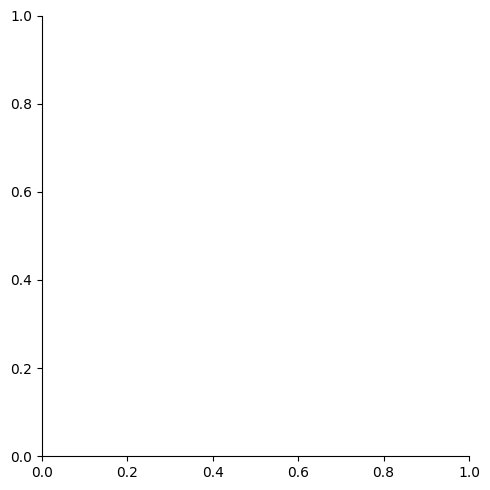

In [21]:
sns.catplot()